In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import pandas as pd
import numpy as np

# Import the matplotlib and seaborn packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Loading and cleaning Data

Import and read the Loan Data.

In [3]:
# Reading the data in python
loan_df = pd.read_csv('loan.csv', sep=',', encoding='ISO-8859-1')

loan_df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.000,36 months,10.65%,162.870,B,B2,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.000,60 months,15.27%,59.830,C,C4,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.000,36 months,15.96%,84.330,C,C5,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.000,36 months,13.49%,339.310,C,C1,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
4,1075358,1311748,3000,3000,3000.000,60 months,12.69%,67.790,B,B5,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
5,1075269,1311441,5000,5000,5000.000,36 months,7.90%,156.460,A,A4,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
6,1069639,1304742,7000,7000,7000.000,60 months,15.96%,170.080,C,C5,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
7,1072053,1288686,3000,3000,3000.000,36 months,18.64%,109.430,E,E1,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
8,1071795,1306957,5600,5600,5600.000,60 months,21.28%,152.390,F,F2,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
9,1071570,1306721,5375,5375,5350.000,60 months,12.69%,121.450,B,B5,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan


In [4]:
# inspecting data
print(loan_df.shape)
print(loan_df.info())
loan_df.describe()

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,...,0.000,0.000,0.000,0.000,39020.000,39678.000,0.000,0.000,0.000,0.000
mean,683131.913,850463.559,11219.444,10947.713,10397.449,324.562,68968.926,13.315,0.147,0.869,...,nan,nan,nan,nan,0.043,0.000,nan,nan,nan,nan
std,210694.133,265678.307,7456.671,7187.239,7128.450,208.875,63793.766,6.679,0.492,1.070,...,nan,nan,nan,nan,0.204,0.000,nan,nan,nan,nan
min,54734.000,70699.000,500.000,500.000,0.000,15.690,4000.000,0.000,0.000,0.000,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
25%,516221.000,666780.000,5500.000,5400.000,5000.000,167.020,40404.000,8.170,0.000,0.000,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
50%,665665.000,850812.000,10000.000,9600.000,8975.000,280.220,59000.000,13.400,0.000,1.000,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
75%,837755.000,1047339.000,15000.000,15000.000,14400.000,430.780,82300.000,18.600,0.000,1.000,...,nan,nan,nan,nan,0.000,0.000,nan,nan,nan,nan
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,1305.190,6000000.000,29.990,11.000,8.000,...,nan,nan,nan,nan,2.000,0.000,nan,nan,nan,nan


In [5]:
# From metadata we observed that id is unique for each loan application. Verifying that
print(loan_df['id'].nunique())

39717


In [6]:
# Finding the percentage of null values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

id                                 0.000
member_id                          0.000
loan_amnt                          0.000
funded_amnt                        0.000
funded_amnt_inv                    0.000
term                               0.000
int_rate                           0.000
installment                        0.000
grade                              0.000
sub_grade                          0.000
emp_title                          6.190
emp_length                         2.710
home_ownership                     0.000
annual_inc                         0.000
verification_status                0.000
issue_d                            0.000
loan_status                        0.000
pymnt_plan                         0.000
url                                0.000
desc                              32.580
purpose                            0.000
title                              0.030
zip_code                           0.000
addr_state                         0.000
dti             

In [7]:
# We can drop all columns which have all values as nulls
loan_df.dropna(axis=1,how='all', inplace=True)
loan_df.shape

# 54 columns are dropped

(39717, 57)

In [8]:
# We can see that there are few columns which has high number of null values. We will drop all columns which have more than 50%
# of null values

loan_df=loan_df.loc[:,round(loan_df.isnull().sum()/len(loan_df)*100,2)<50]
loan_df.shape

# 3 more columns are dropped

(39717, 54)

In [9]:
# inspecting data
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,...,39717.000,39717.000,39717.000,39661.000,39717.000,39717.000,39661.000,39717.000,39020.000,39678.000
mean,683131.913,850463.559,11219.444,10947.713,10397.449,324.562,68968.926,13.315,0.147,0.869,...,95.222,12.406,2678.826,0.000,1.000,0.000,0.000,0.000,0.043,0.000
std,210694.133,265678.307,7456.671,7187.239,7128.450,208.875,63793.766,6.679,0.492,1.070,...,688.745,148.672,4447.136,0.000,0.000,0.000,0.000,0.000,0.204,0.000
min,54734.000,70699.000,500.000,500.000,0.000,15.690,4000.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,516221.000,666780.000,5500.000,5400.000,5000.000,167.020,40404.000,8.170,0.000,0.000,...,0.000,0.000,218.680,0.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,665665.000,850812.000,10000.000,9600.000,8975.000,280.220,59000.000,13.400,0.000,1.000,...,0.000,0.000,546.140,0.000,1.000,0.000,0.000,0.000,0.000,0.000
75%,837755.000,1047339.000,15000.000,15000.000,14400.000,430.780,82300.000,18.600,0.000,1.000,...,0.000,0.000,3293.160,0.000,1.000,0.000,0.000,0.000,0.000,0.000
max,1077501.000,1314167.000,35000.000,35000.000,35000.000,1305.190,6000000.000,29.990,11.000,8.000,...,29623.350,7002.190,36115.200,0.000,1.000,0.000,0.000,0.000,2.000,0.000


In [10]:
# We can also see from data above and from source that there are many columns with just a single value. So, we will drop those 
# columns as well

loan_df= loan_df.loc[:,loan_df.nunique()!=1]

#inspecting data
print(loan_df.shape)
print(loan_df.info())

(39717, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
url                        39717 non-null objec

#### Dropping unneccsary columns.
We are now left with 45 such columns. 
Out of these 45 columns there are some identifiers which can be dropped
Eg. member_id, url, emp_title, desc, Zip Code, title which are not required while doing the analysis for Aggregated data.

revol_bal and revol_util are same (amount and %). So, we drop revol balance. We have also observed that if revol_bal is zero than revol_util is null. Which can be imputed later.

Since we are interested to understand factors leading to loan being charged off we can drop all columns which are calculated after the loan is being charged off.
So, we can drop: total_rec_prncp, total_rec_int, total_rec_late_fee, collection_recovery_fee, recoveries, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, out_prncp, out_prncp_inv


In [11]:
# Dropping all columns which are unique for customer and loan related attributes which
# cannot be used to do the analysis for the given business problem
drop_cols=['member_id','url','emp_title','desc','title','zip_code','last_credit_pull_d',
           'last_pymnt_d','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
           'last_pymnt_amnt', 'total_rec_prncp','out_prncp', 'out_prncp_inv','revol_bal']
loan_df.drop(drop_cols,axis=1, inplace=True)

In [12]:
print(loan_df.shape)

(39717, 28)


In [13]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
id                      39717 non-null int64
loan_amnt               39717 non-null int64
funded_amnt             39717 non-null int64
funded_amnt_inv         39717 non-null float64
term                    39717 non-null object
int_rate                39717 non-null object
installment             39717 non-null float64
grade                   39717 non-null object
sub_grade               39717 non-null object
emp_length              38642 non-null object
home_ownership          39717 non-null object
annual_inc              39717 non-null float64
verification_status     39717 non-null object
issue_d                 39717 non-null object
loan_status             39717 non-null object
purpose                 39717 non-null object
addr_state              39717 non-null object
dti                     39717 non-null float64
delinq_2yrs             39717 non-null int64
earliest_cr_line 

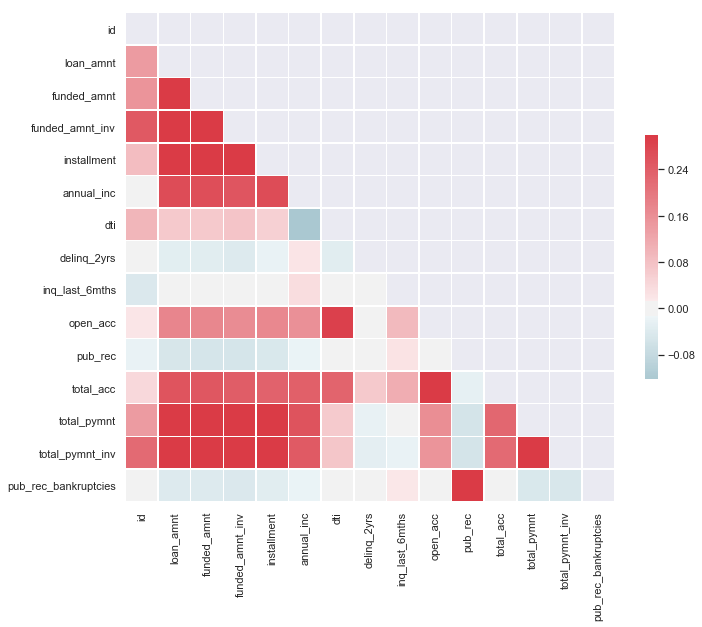

In [14]:
# Creating a correlation matrix

corr = loan_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### We can drop few more columns which are highly correlated. 
If we analyse based on 1 column other correlated columns will show similar trend

loan_amnt,funded_amnt, funded_amnt_inv, installment, total_pymnt, total_pymnt_inv are highly correlated. 
So, we will retain loan_amnt and will drop rest.

Similarly pub_rec and pub_rec_bankruptcies are highly correlated, so we will retain pub_rec and drop pub_rec_bankruptcies.

In [15]:
drop_cols=['funded_amnt','funded_amnt_inv','installment','total_pymnt','total_pymnt_inv','pub_rec_bankruptcies']
loan_df.drop(drop_cols,axis=1, inplace=True)

In [16]:
print(loan_df.info())
loan_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 22 columns):
id                     39717 non-null int64
loan_amnt              39717 non-null int64
term                   39717 non-null object
int_rate               39717 non-null object
grade                  39717 non-null object
sub_grade              39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
purpose                39717 non-null object
addr_state             39717 non-null object
dti                    39717 non-null float64
delinq_2yrs            39717 non-null int64
earliest_cr_line       39717 non-null object
inq_last_6mths         39717 non-null int64
open_acc               39717 non-null int64
pub_rec                39717 non-null i

,id,loan_amnt,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc
count,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000,39717.000
mean,683131.913,11219.444,68968.926,13.315,0.147,0.869,9.294,0.055,22.089
std,210694.133,7456.671,63793.766,6.679,0.492,1.070,4.400,0.237,11.402
min,54734.000,500.000,4000.000,0.000,0.000,0.000,2.000,0.000,2.000
25%,516221.000,5500.000,40404.000,8.170,0.000,0.000,6.000,0.000,13.000
50%,665665.000,10000.000,59000.000,13.400,0.000,1.000,9.000,0.000,20.000
75%,837755.000,15000.000,82300.000,18.600,0.000,1.000,12.000,0.000,29.000
max,1077501.000,35000.000,6000000.000,29.990,11.000,8.000,44.000,4.000,90.000


In [17]:
# Converting interest rates & revol util from sting to floats
loan_df['int_rate']=loan_df['int_rate'].str.rstrip('%').astype('float')
loan_df['revol_util']=loan_df['revol_util'].str.rstrip('%').astype('float')

In [18]:
# Converting issue_d into month and year
loan_df['issue_month'] , loan_df['issue_year'] = loan_df['issue_d'].str.split('-' , 1).str
loan_df.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year
0,1077501,5000,36 months,10.650,B,B2,10+ years,RENT,24000.000,Verified,...,27.650,0,Jan-85,1,3,0,83.700,9,Dec,11
1,1077430,2500,60 months,15.270,C,C4,< 1 year,RENT,30000.000,Source Verified,...,1.000,0,Apr-99,5,3,0,9.400,4,Dec,11
2,1077175,2400,36 months,15.960,C,C5,10+ years,RENT,12252.000,Not Verified,...,8.720,0,Nov-01,2,2,0,98.500,10,Dec,11
3,1076863,10000,36 months,13.490,C,C1,10+ years,RENT,49200.000,Source Verified,...,20.000,0,Feb-96,1,10,0,21.000,37,Dec,11
4,1075358,3000,60 months,12.690,B,B5,1 year,RENT,80000.000,Source Verified,...,17.940,0,Jan-96,0,15,0,53.900,38,Dec,11


In [19]:
# To analyse the defaulters we don't need the loan status = Current. 
loan_df=loan_df[loan_df.loan_status !='Current']
loan_df.shape

(38577, 24)

In [20]:
# Finding the percentage of null values in each column
round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

id                    0.000
loan_amnt             0.000
term                  0.000
int_rate              0.000
grade                 0.000
sub_grade             0.000
emp_length            2.680
home_ownership        0.000
annual_inc            0.000
verification_status   0.000
issue_d               0.000
loan_status           0.000
purpose               0.000
addr_state            0.000
dti                   0.000
delinq_2yrs           0.000
earliest_cr_line      0.000
inq_last_6mths        0.000
open_acc              0.000
pub_rec               0.000
revol_util            0.130
total_acc             0.000
issue_month           0.000
issue_year            0.000
dtype: float64

In [21]:
# Imputing null columns
loan_df.loc[pd.isnull(loan_df['revol_util']), ['revol_util']] = 0

In [22]:
loan_df['emp_length'].describe()


count         37544
unique           11
top       10+ years
freq           8488
Name: emp_length, dtype: object

In [23]:
loan_df.loc[pd.isnull(loan_df['emp_length']), ['emp_length']] = 'Not Defined'
# As employment length is not available but the income is present.

In [24]:
# binning annual income based on values
def set_range_of_inc(income):
    return (
        "0-45k" if income <= 45000
        else
        "45-60k" if 45000 < income <= 60000
        else
        "60-75k" if 60000 < income <= 75000
        else
        "75-90k" if 75000 < income <= 90000
        else
        "90-105k" if 90000 < income <= 105000
        else
        "105-120k" if 105000 < income <= 120000
        else
        "> 120k" 
    )

In [25]:
# Binning data
loan_df['annual_inc_groups']  = loan_df['annual_inc'].apply(set_range_of_inc)
loan_df['int_rate_group'] = pd.cut(loan_df['int_rate'] , range(5 , 25 , 3) , right = False)
loan_df['dti_rate_group'] = pd.cut(loan_df['dti'] , range(0 , 31 , 5) , right = False)
loan_df['revol_util_group'] = pd.cut(loan_df['revol_util'] , range(0 ,101 , 20) , right = False)

In [26]:
loan_df

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_util,total_acc,issue_month,issue_year,annual_inc_groups,int_rate_group,dti_rate_group,revol_util_group
0,1077501,5000,36 months,10.650,B,B2,10+ years,RENT,24000.000,Verified,...,3,0,83.700,9,Dec,11,0-45k,"[8, 11)","[25, 30)","[80, 100)"
1,1077430,2500,60 months,15.270,C,C4,< 1 year,RENT,30000.000,Source Verified,...,3,0,9.400,4,Dec,11,0-45k,"[14, 17)","[0, 5)","[0, 20)"
2,1077175,2400,36 months,15.960,C,C5,10+ years,RENT,12252.000,Not Verified,...,2,0,98.500,10,Dec,11,0-45k,"[14, 17)","[5, 10)","[80, 100)"
3,1076863,10000,36 months,13.490,C,C1,10+ years,RENT,49200.000,Source Verified,...,10,0,21.000,37,Dec,11,45-60k,"[11, 14)","[20, 25)","[20, 40)"
5,1075269,5000,36 months,7.900,A,A4,3 years,RENT,36000.000,Source Verified,...,9,0,28.300,12,Dec,11,0-45k,"[5, 8)","[10, 15)","[20, 40)"
6,1069639,7000,60 months,15.960,C,C5,8 years,RENT,47004.000,Not Verified,...,7,0,85.600,11,Dec,11,45-60k,"[14, 17)","[20, 25)","[80, 100)"
7,1072053,3000,36 months,18.640,E,E1,9 years,RENT,48000.000,Source Verified,...,4,0,87.500,4,Dec,11,45-60k,"[17, 20)","[5, 10)","[80, 100)"
8,1071795,5600,60 months,21.280,F,F2,4 years,OWN,40000.000,Source Verified,...,11,0,32.600,13,Dec,11,0-45k,"[20, 23)","[5, 10)","[20, 40)"
9,1071570,5375,60 months,12.690,B,B5,< 1 year,RENT,15000.000,Verified,...,2,0,36.500,3,Dec,11,0-45k,"[11, 14)","[15, 20)","[20, 40)"
10,1070078,6500,60 months,14.650,C,C3,5 years,OWN,72000.000,Not Verified,...,14,0,20.600,23,Dec,11,60-75k,"[14, 17)","[15, 20)","[20, 40)"


In [27]:
loan_df.describe()

,id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
count,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000,38577.000
mean,676378.707,11047.025,11.932,68777.974,13.273,0.147,0.872,9.275,0.055,48.640,22.053
std,209263.898,7348.442,3.691,64218.682,6.673,0.492,1.072,4.402,0.238,28.400,11.426
min,54734.000,500.000,5.420,4000.000,0.000,0.000,0.000,2.000,0.000,0.000,2.000
25%,512033.000,5300.000,8.940,40000.000,8.130,0.000,0.000,6.000,0.000,25.100,13.000
50%,656423.000,9600.000,11.710,58868.000,13.370,0.000,1.000,9.000,0.000,49.000,20.000
75%,829146.000,15000.000,14.380,82000.000,18.560,0.000,1.000,12.000,0.000,72.200,29.000
max,1077501.000,35000.000,24.400,6000000.000,29.990,11.000,8.000,44.000,4.000,99.900,90.000


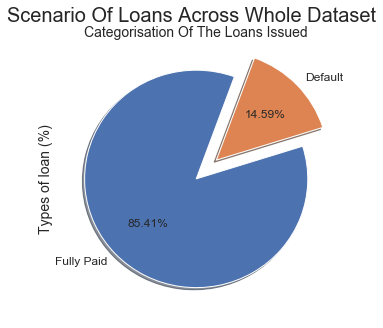

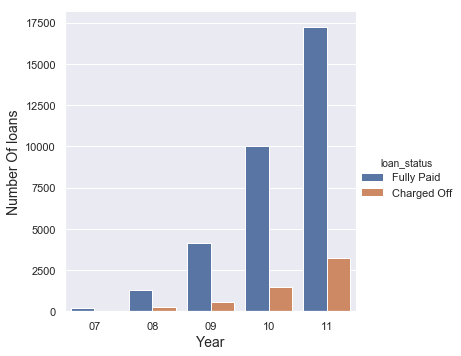

In [28]:
plt.figure(figsize = (5 , 5))
                 
plt.suptitle('Scenario Of Loans Across Whole Dataset' , fontsize = 20)

plt.title('Proportion Of the types of loans' , fontsize = 14)
labels = "Fully Paid" , "Default"
loan_df['loan_status'].value_counts().plot.pie(explode = [0,0.25] , autopct = '%1.2f%%' , shadow = True , labels = labels , fontsize = 12 , startangle = 70)
plt.ylabel('Types of loan (%)' , fontsize = 14) 

plt.title('Categorisation Of The Loans Issued' , fontsize = 14)
sns.catplot(x="issue_year" , kind = "count" , data=loan_df ,hue='loan_status')
plt.xlabel('Year' , fontsize = 14)
plt.ylabel('Number Of loans' , fontsize = 14 ) 

plt.show()

It can be seen that 2011 issued the highest number of loans and 2007 is the highest contributor of defaulted loans. 85.41% of the total loans issued are fully paid whereas 14.59% of the total loans issued are defaulted.

### Analysing loan status against various variables

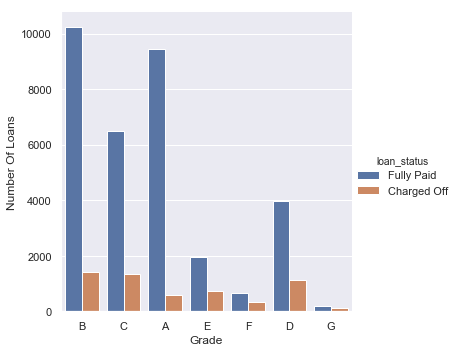

loan_status,Charged Off,Fully Paid,%_Loan_Defaulted
grade,,,
A,602,9443,5.990
B,1425,10250,12.210
C,1347,6487,17.190
D,1118,3967,21.990
E,715,1948,26.850
F,319,657,32.680
G,101,198,33.780


In [29]:
# Analysing for Grade
sns.catplot(x="grade", kind="count",data=loan_df ,hue='loan_status')
plt.xlabel('Grade')
plt.ylabel('Number Of Loans')
plt.show()

df_loan_grade = loan_df.pivot_table(values = 'id', 
                      index = 'grade',
                      columns = 'loan_status' ,              
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by grade
df_loan_grade['%_Loan_Defaulted']=round((df_loan_grade['Charged Off'])/df_loan_grade.sum(axis=1)*100,2)

df_loan_grade

Observation : We can see that high number of loans are issued to Grade B, C, A and D.
It is also seen that as Grade increases , the percentage of loans that defaulted also increases - Grade A having the lowest percentage of loan defaults with 5.99 % which increases gradually as the Grade increases with Grade G having the highest percentage of 33.78%.

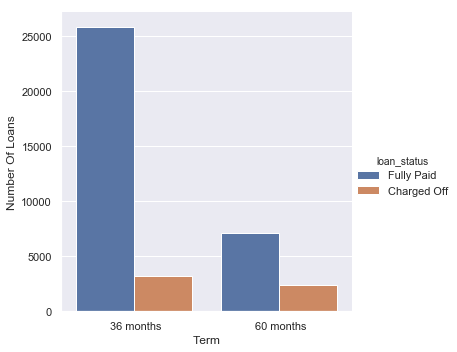

loan_status,Charged Off,Fully Paid,%_Loan_Defaulted
term,,,
36 months,3227,25869,11.090
60 months,2400,7081,25.310


In [30]:
# Analysing for term
sns.catplot(x="term", kind="count",data=loan_df ,hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Number Of Loans' )
plt.show()

df_loan_term = loan_df.pivot_table(values = 'id', 
                      index = 'term', 
                      columns = 'loan_status', 
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by grade
df_loan_term['%_Loan_Defaulted']=round((df_loan_term['Charged Off'])/df_loan_term.sum(axis=1)*100,2)

df_loan_term

Observation: More number of loans are issued for a term of 36 months which has a less percentage of default while less loans are issued for a term of 60 months which has a high percentage of default. Thus it is good to see that the bank is taking precautions while lending loans to people for a term duration of 60 months.

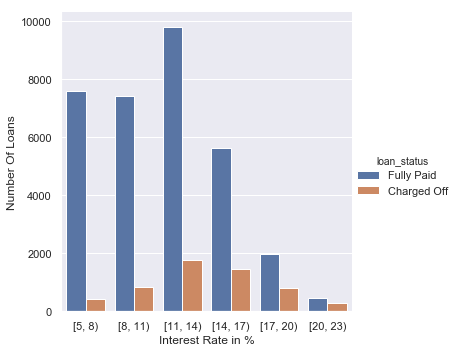

loan_status,Charged Off,Fully Paid,%_Loan_Defaulted
int_rate_group,,,
"[5, 8)",430,7597,5.360
"[8, 11)",854,7443,10.290
"[11, 14)",1776,9820,15.320
"[14, 17)",1466,5635,20.640
"[17, 20)",805,1981,28.890
"[20, 23)",281,449,38.490


In [31]:
# Analysing for Interest Rate
sns.catplot(x="int_rate_group", kind="count",data=loan_df ,hue='loan_status')
plt.xlabel('Interest Rate in %')
plt.ylabel('Number Of Loans' )
plt.show()

df_loan_int = loan_df.pivot_table(values = 'id', 
                      index = 'int_rate_group', 
                      columns = 'loan_status', 
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by grade
df_loan_int['%_Loan_Defaulted']=round((df_loan_int['Charged Off'])/df_loan_int.sum(axis=1)*100,2)

df_loan_int

Observation: Loans with interest rates higher than 11% tend to default more and the highest number of loans has been issued with rate of interest 11-14 % . It is seen that as the interest rate increases , the percentage of default also increases which is as expected. Thus the bank should try to issue loans with less than 11% interest rate. 

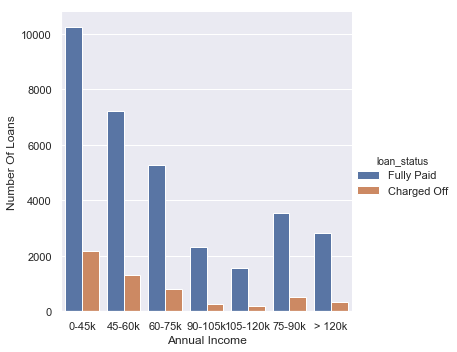

loan_status,Charged Off,Fully Paid,%_Loan_Defaulted
annual_inc_groups,,,
0-45k,2167,10260,17.440
105-120k,190,1562,10.840
45-60k,1313,7221,15.390
60-75k,819,5277,13.440
75-90k,510,3525,12.640
90-105k,280,2300,10.850
> 120k,348,2805,11.040


In [32]:
# Analysing for Annual Income
sns.catplot(x="annual_inc_groups", kind="count",data=loan_df ,hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Number Of Loans' )
plt.show()


df_loan_inc = loan_df.pivot_table(values = 'id', 
                      index = 'annual_inc_groups', 
                      columns = 'loan_status', 
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by grade
df_loan_inc['%_Loan_Defaulted']=round((df_loan_inc['Charged Off'])/df_loan_inc.sum(axis=1)*100,2)

df_loan_inc

Observation: Applicants within lower income bracket tend to default more. Also the highest number of loans have been issued to people in the annual income group range of 0-45k which has the highest default percentage. It is seen that as annual income increases , the percentage of default decreases , which is expected. Thus , the bank should undertake precautions while issuing loans to people with low annual income. 

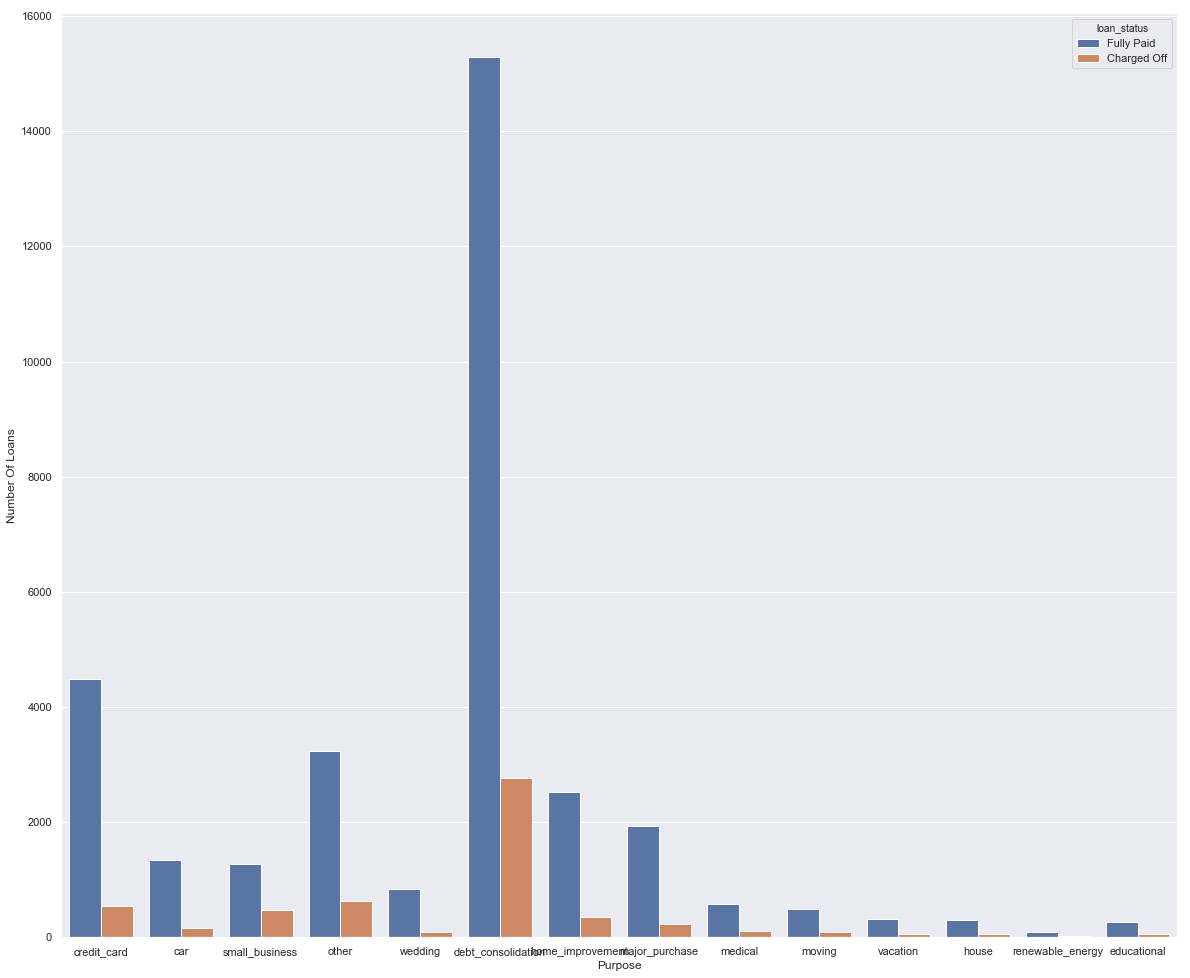

loan_status,Charged Off,Fully Paid,%_Loan_Defaulted
purpose,,,
car,160,1339,10.670
credit_card,542,4485,10.780
debt_consolidation,2767,15288,15.330
educational,56,269,17.230
home_improvement,347,2528,12.070
house,59,308,16.080
major_purchase,222,1928,10.330
medical,106,575,15.570
moving,92,484,15.970


In [33]:
#Analysing for purpose
plt.figure(figsize = (20 , 17))
sns.countplot(x="purpose",data=loan_df ,hue='loan_status')
plt.xlabel('Purpose')
plt.ylabel('Number Of Loans' )
plt.show()

# finding the total no of approved loan requests by purpose that are fully paid, charged off or ongoing.
df_loanrequestbypurpose = loan_df.pivot_table(values = 'id', 
                      index = 'purpose', 
                      columns = 'loan_status', 
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by purpose
df_loanrequestbypurpose['%_Loan_Defaulted']=round((df_loanrequestbypurpose['Charged Off'])/df_loanrequestbypurpose.sum(axis=1)*100,2)

df_loanrequestbypurpose

Observation: Loans issued for the purpose of Small Business has a staggeringly high percentage of 27%. This may be due to the reason that loans are issued at the time when the business is in its nascent stage and thus have a high probability of getting desolved if the business does not function properly , creating difficulty for Small Business Owners to return the loan amount with interest that has already been invested. Thus the banks should inspect if the Small Business Owners have a viable and proper business plan and then issue the loan.
Here , the percentage of loan default due to different purpose does not show any trend.

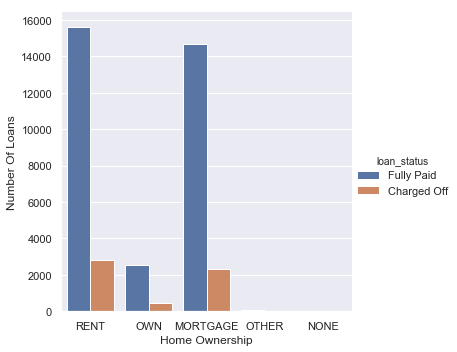

loan_status,Charged Off,Fully Paid,%_Loan_Defaulted
home_ownership,,,
MORTGAGE,2327.000,14694.000,13.670
NONE,0.000,3.000,0.000
OTHER,18.000,80.000,18.370
OWN,443.000,2532.000,14.890
RENT,2839.000,15641.000,15.360


In [34]:
#Analysing Home Ownership
sns.catplot(x="home_ownership", kind="count",data=loan_df ,hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Number Of Loans' )
plt.show()

# finding the total no of approved loan requests by home ownership that are fully paid, charged off or ongoing.
df_loanrequestbyhome_ownership = loan_df.pivot_table(values = 'id', 
                      index = 'home_ownership', 
                      columns = 'loan_status', 
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by home ownership
df_loanrequestbyhome_ownership['%_Loan_Defaulted']=round((df_loanrequestbyhome_ownership['Charged Off'])/df_loanrequestbyhome_ownership.sum(axis=1)*100,2)

df_loanrequestbyhome_ownership.fillna(0, inplace=True)

df_loanrequestbyhome_ownership

Observation : Highest number of loans have been issued to Home Ownership of type Rent followed by Mortgage. Rent also has the highest number of fully paid loans followed by mortgage. Home Ownership of type None has the highest percentage of default and it is good to see that the bank has issued very low number of loans , given it high default percentage.

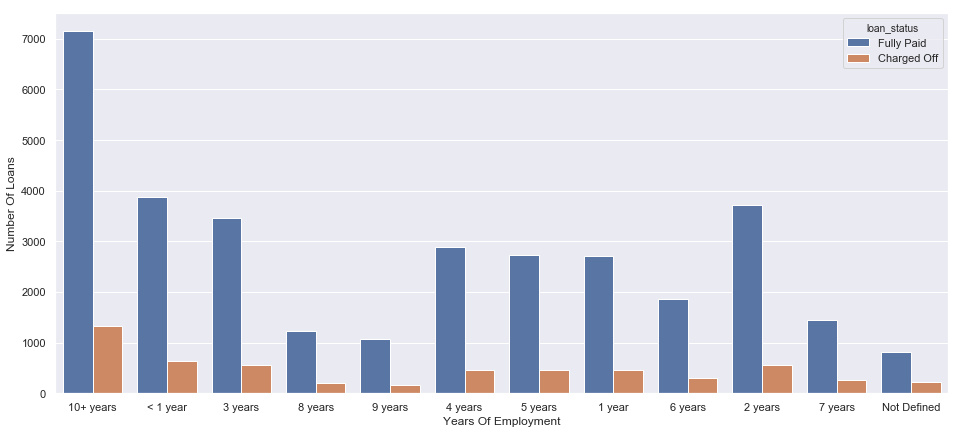

loan_status,Charged Off,Fully Paid,%_Loan_Defaulted
emp_length,,,
1 year,456,2713,14.390
10+ years,1331,7157,15.680
2 years,567,3724,13.210
3 years,555,3457,13.830
4 years,462,2880,13.820
5 years,458,2736,14.340
6 years,307,1861,14.160
7 years,263,1448,15.370
8 years,203,1232,14.150


In [35]:
#Analysing emp_length
plt.figure(figsize = (16 , 7))
sns.countplot(x="emp_length",data=loan_df ,hue='loan_status')
plt.xlabel('Years Of Employment')
plt.ylabel('Number Of Loans' )
plt.show()
# finding the total no of approved loan requests by employment length that are fully paid, charged off or ongoing.
df_loanrequestbyemp_length = loan_df.pivot_table(values = 'id', 
                      index = 'emp_length', 
                      columns = 'loan_status', 
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by employmentlength
df_loanrequestbyemp_length['%_Loan_Defaulted']=round((df_loanrequestbyemp_length['Charged Off'])/df_loanrequestbyemp_length.sum(axis=1)*100,2)

df_loanrequestbyemp_length

Observation : People with 10+ years of employment are taking highest number of loans and default rate is also high for them.
For applicants with Not Defined emp_length the loan default rate is also high.

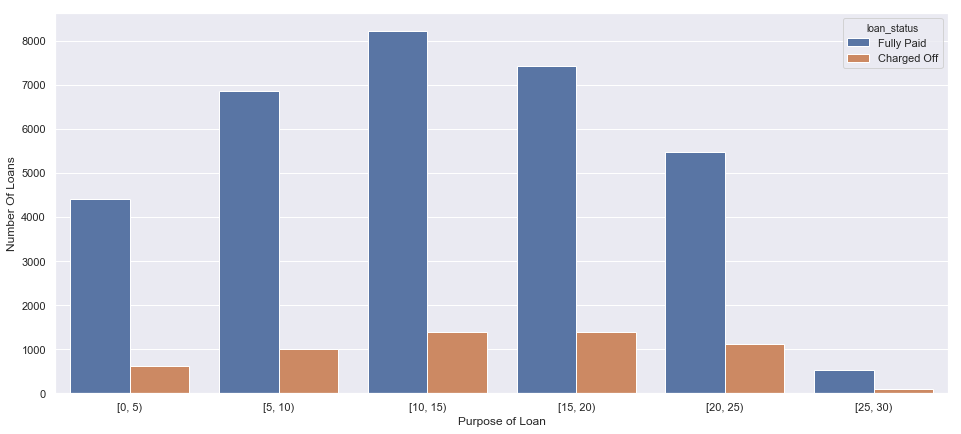

loan_status,Charged Off,Fully Paid,%_Loan_Defaulted
dti_rate_group,,,
"[0, 5)",625,4419,12.390
"[5, 10)",1001,6860,12.730
"[10, 15)",1399,8225,14.540
"[15, 20)",1394,7430,15.800
"[20, 25)",1121,5478,16.990
"[25, 30)",87,538,13.920


In [36]:
# Analysing dti 
plt.figure(figsize = (16 , 7))
sns.countplot(x="dti_rate_group",data=loan_df ,hue='loan_status')
plt.xlabel('Purpose of Loan')
plt.ylabel('Number Of Loans' )
plt.show()
# finding the total no of approved loan requests by dti that are fully paid, charged off or ongoing.
df_loan_dti = loan_df.pivot_table(values = 'id', 
                      index = 'dti_rate_group', 
                      columns = 'loan_status', 
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by dti
df_loan_dti['%_Loan_Defaulted']=round((df_loan_dti['Charged Off'])/df_loan_dti.sum(axis=1)*100,2)

df_loan_dti

Observations: Default rate increases with in with increase in DTI%.

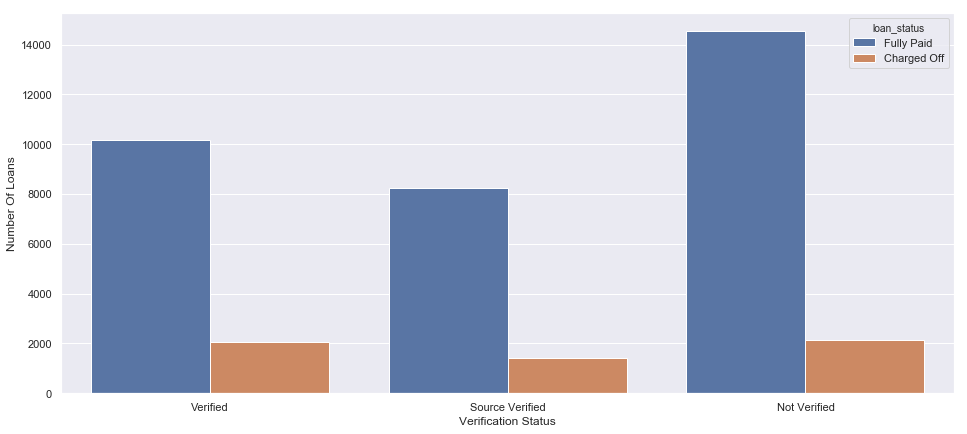

loan_status,Charged Off,Fully Paid,%_Loan_Defaulted
verification_status,,,
Not Verified,2142,14552,12.830
Source Verified,1434,8243,14.820
Verified,2051,10155,16.800


In [37]:
#Analysing verification
plt.figure(figsize = (16 , 7))
sns.countplot(x="verification_status",data=loan_df ,hue='loan_status')
plt.xlabel('Verification Status')
plt.ylabel('Number Of Loans' )
plt.show()
# finding the total no of approved loan requests by verification that are fully paid, charged off or ongoing.
df_loan_verification = loan_df.pivot_table(values = 'id', 
                      index = 'verification_status', 
                      columns = 'loan_status', 
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by dti
df_loan_verification['%_Loan_Defaulted']=round((df_loan_verification['Charged Off'])/df_loan_verification.sum(axis=1)*100,2)

df_loan_verification

Observations: It is surprising to see that Verified and Source Verified applicants are having high default rates.

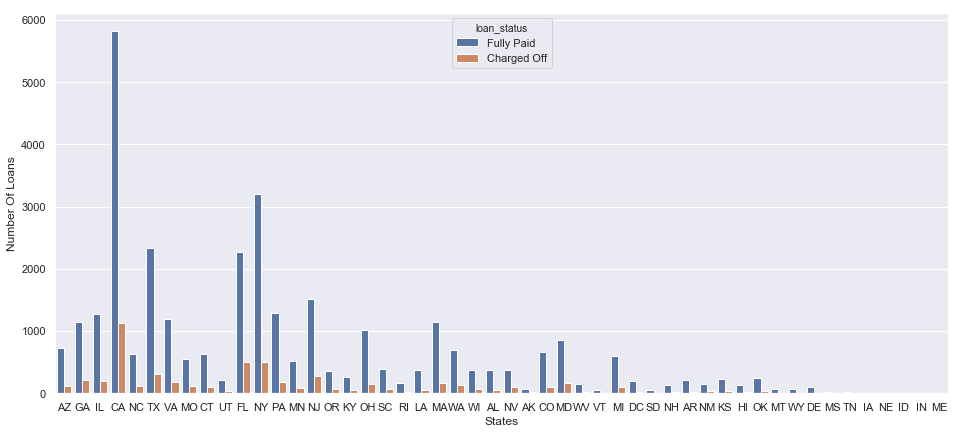

loan_status,Charged Off,Fully Paid,%_Loan_Defaulted
addr_state,,,
AK,15.000,63.000,19.230
AL,54.000,381.000,12.410
AR,27.000,208.000,11.490
AZ,123.000,726.000,14.490
CA,1125.000,5824.000,16.190
CO,98.000,668.000,12.790
CT,94.000,632.000,12.950
DC,15.000,196.000,7.110
DE,12.000,101.000,10.620


In [38]:
#Analysing state
plt.figure(figsize = (16 , 7))
sns.countplot(x="addr_state",data=loan_df ,hue='loan_status')
plt.xlabel('States')
plt.ylabel('Number Of Loans' )
plt.show()
# finding the total no of approved loan requests by state that are fully paid, charged off or ongoing.
df_loan_state = loan_df.pivot_table(values = 'id', 
                      index = 'addr_state', 
                      columns = 'loan_status', 
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by state
df_loan_state['%_Loan_Defaulted']=round((df_loan_state['Charged Off'])/df_loan_state.sum(axis=1)*100,2)

df_loan_state

Observations: For some states there are no defaulters (IA,IN, ME). For some states the Default rate is quite high. It is highest for the state of Nevada.

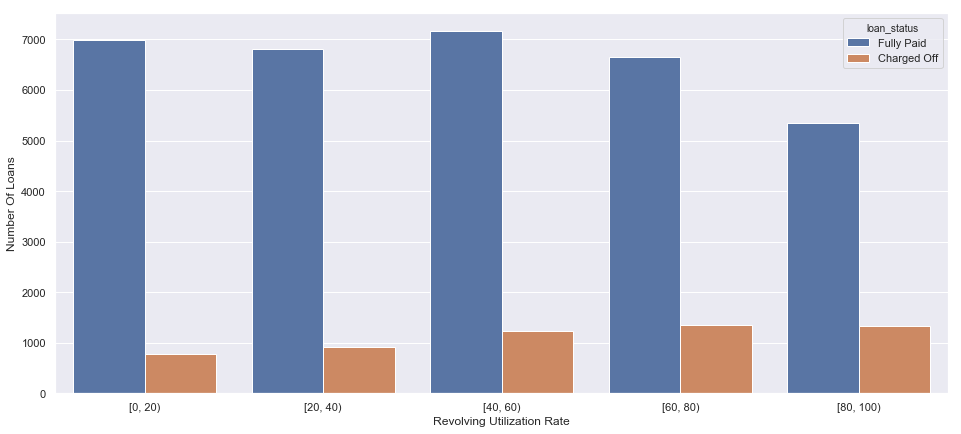

loan_status,Charged Off,Fully Paid,%_Loan_Default
revol_util_group,,,
"[0, 20)",783,6982,10.080
"[20, 40)",913,6802,11.830
"[40, 60)",1232,7170,14.660
"[60, 80)",1359,6653,16.960
"[80, 100)",1340,5343,20.050


In [39]:
#Analysing revol_util
plt.figure(figsize = (16 , 7))
sns.countplot(x="revol_util_group",data=loan_df ,hue='loan_status')
plt.xlabel('Revolving Utilization Rate')
plt.ylabel('Number Of Loans' )
plt.show()
# finding the total no of approved loan requests by revol util that are fully paid, charged off or ongoing.
df_loan_util = loan_df.pivot_table(values = 'id', 
                      index = 'revol_util_group', 
                      columns = 'loan_status', 
                      aggfunc = 'count')

# finding the Percentage of loans defaulted by revol util
df_loan_util['%_Loan_Default']=round((df_loan_util['Charged Off'])/df_loan_util.sum(axis=1)*100,2)

df_loan_util

Observations: As revol_util rate increases the % of defaulters increases.

### Analysing Multiple Variables together

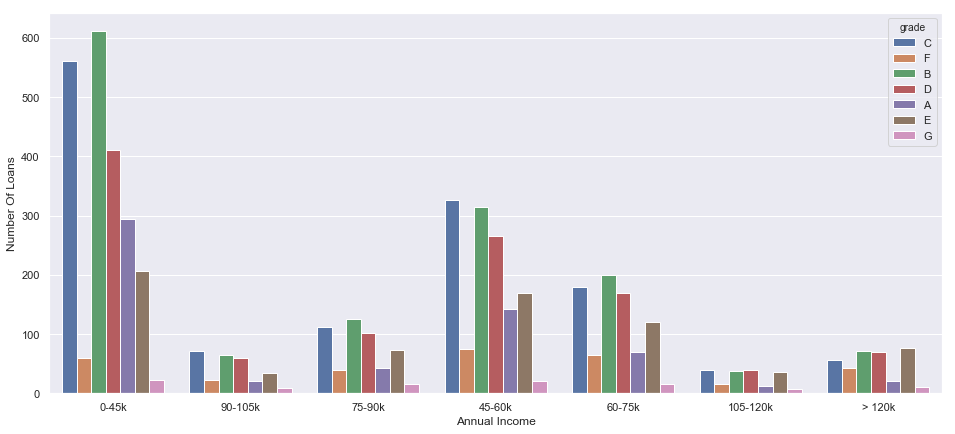

In [40]:
# Income and Grade
plt.figure(figsize = (16 , 7))
sns.countplot(x="annual_inc_groups",data=loan_df[loan_df['loan_status'] == 'Charged Off'] ,hue='grade')
plt.xlabel('Annual Income')
plt.ylabel('Number Of Loans' )
plt.show()

Observation: In All income groups Grade B, C and D loan tends to default more.

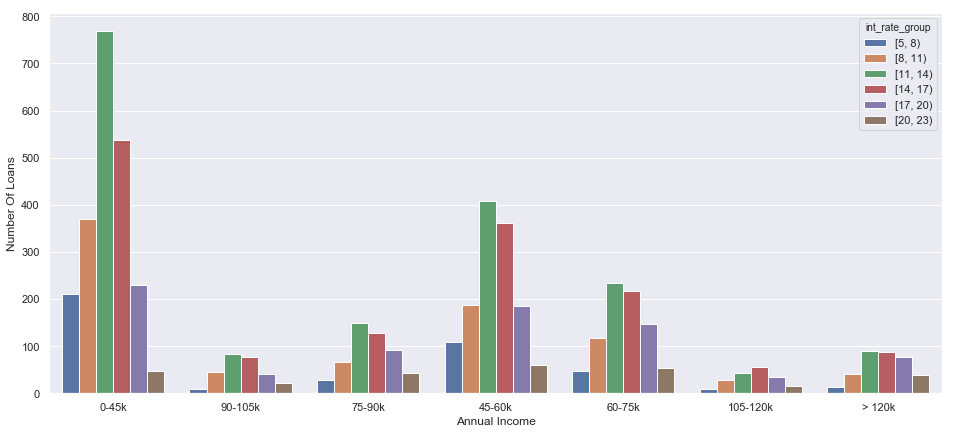

In [41]:
# Income and Rate of Interest
plt.figure(figsize = (16 , 7))
sns.countplot(x="annual_inc_groups",data=loan_df[loan_df['loan_status'] == 'Charged Off'] ,hue='int_rate_group')
plt.xlabel('Annual Income')
plt.ylabel('Number Of Loans' )
plt.show()

Observation: In each income group applicants with interest rate between 11-14% and 14-17% tend to default more.

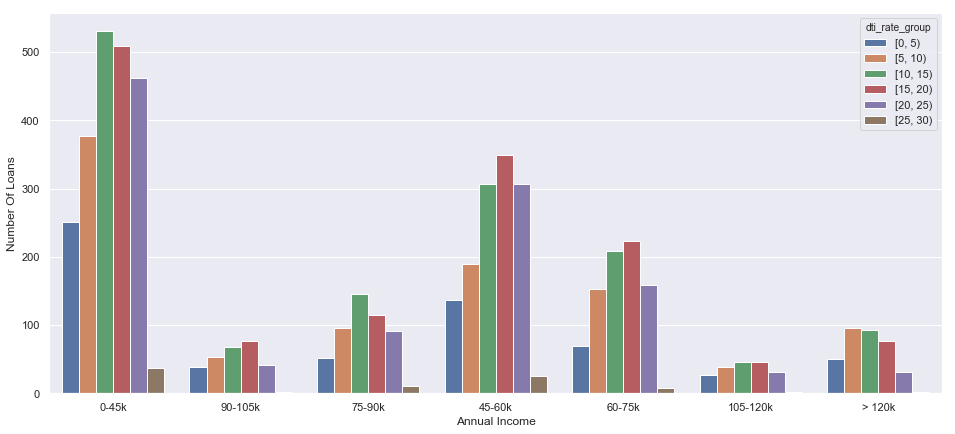

In [42]:
# Income and DTI
plt.figure(figsize = (16 , 7))
sns.countplot(x="annual_inc_groups",data=loan_df[loan_df['loan_status'] == 'Charged Off'] ,hue='dti_rate_group')
plt.xlabel('Annual Income')
plt.ylabel('Number Of Loans' )
plt.show()

Observation: In most income groups applicants having DTI between 10-25% are most likely to default.

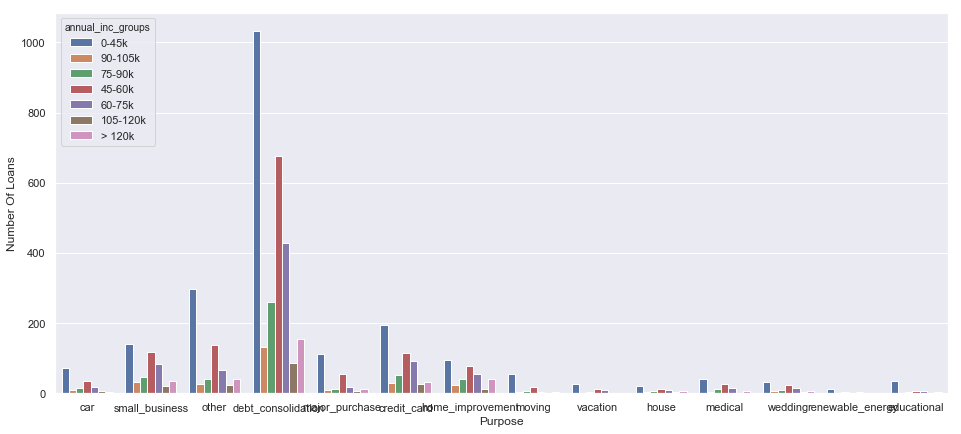

In [43]:
# Income and Purpose
plt.figure(figsize = (16 , 7))
sns.countplot(x="purpose",data=loan_df[loan_df['loan_status'] == 'Charged Off'] ,hue='annual_inc_groups')
plt.xlabel('Purpose')
plt.ylabel('Number Of Loans' )
plt.show()

Observation: High number of applicants are in range of 0-60k income group and they are taking loan for debt consolidation, small businesses, credit card and other categories tend to default more.

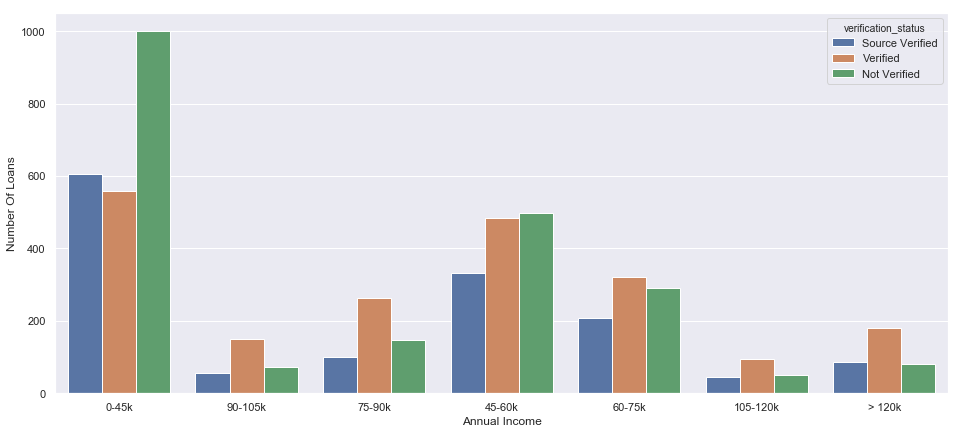

In [44]:
# Income and Verification Status
plt.figure(figsize = (16 , 7))
sns.countplot(x="annual_inc_groups",data=loan_df[loan_df['loan_status'] == 'Charged Off'] ,hue='verification_status')
plt.xlabel('Annual Income')
plt.ylabel('Number Of Loans' )
plt.show()

Observation: In each income group source verfied + verified tends to default more than not verfied. There seems to be some issue with verification process.

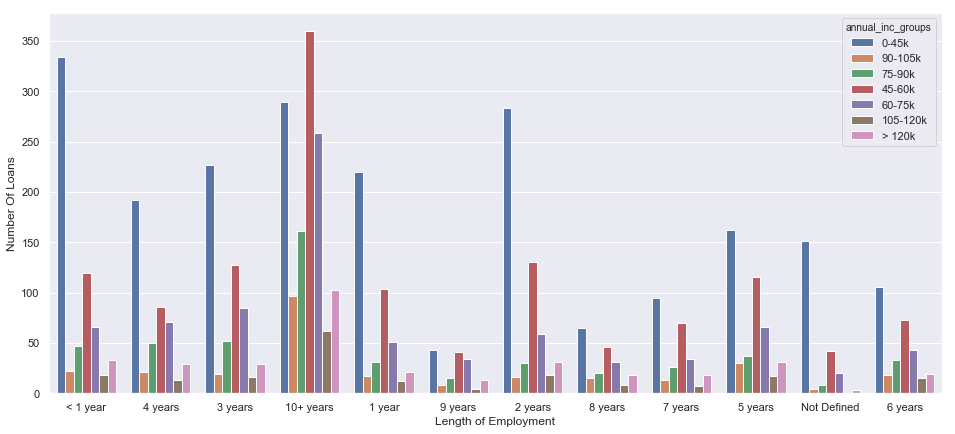

In [45]:
# Income and Employement Status
plt.figure(figsize = (16 , 7))
sns.countplot(x="emp_length",data=loan_df[loan_df['loan_status'] == 'Charged Off'] ,hue='annual_inc_groups')
plt.xlabel('Length of Employment')
plt.ylabel('Number Of Loans' )
plt.show()

Observation: We have highest number of defaulters in employment length 10+ years for all income groups.

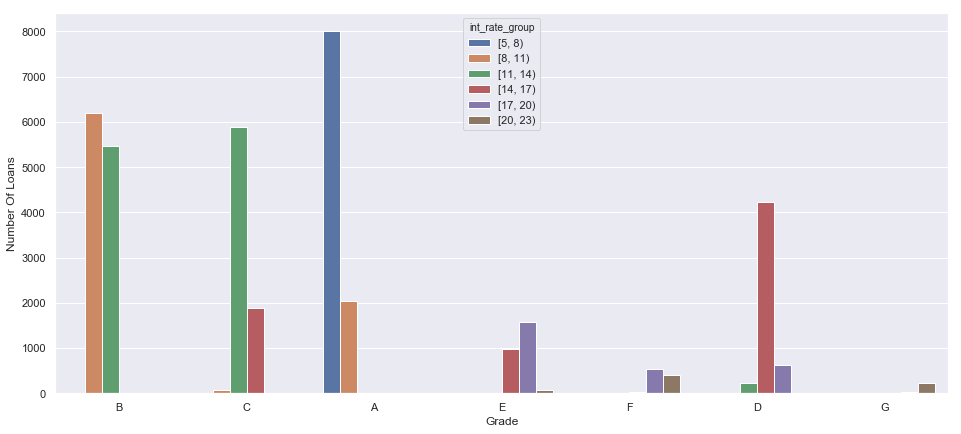

In [46]:
# Grade and Rate of Interest Status
plt.figure(figsize = (16 , 7))
sns.countplot(x="grade",data=loan_df ,hue='int_rate_group')
plt.xlabel('Grade')
plt.ylabel('Number Of Loans' )
plt.show()

Observation: We can directly observe that grades are defined on Rate of Interest. Grade A having lowest interest rates where as G is having highest interest rates.
    

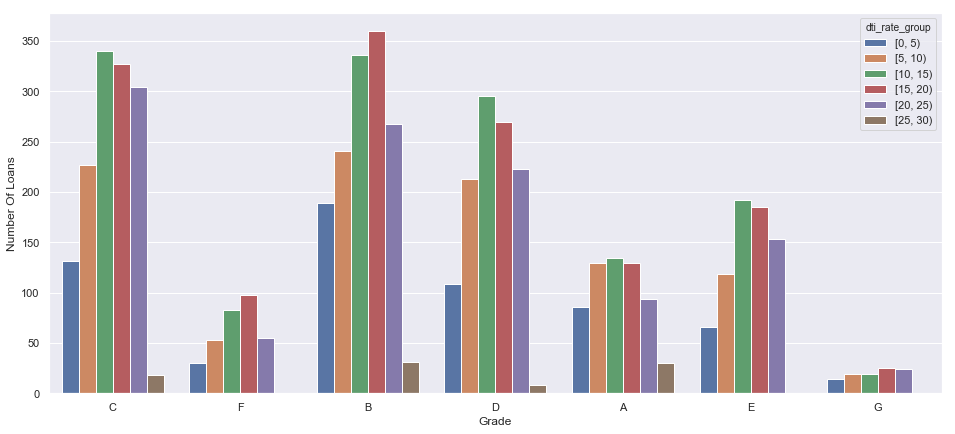

In [47]:
# Grade and DTI
plt.figure(figsize = (16 , 7))
sns.countplot(x="grade",data=loan_df[loan_df['loan_status'] == 'Charged Off'] ,hue='dti_rate_group')
plt.xlabel('Grade')
plt.ylabel('Number Of Loans' )
plt.show()

Observations: Since we have highest number of defaulters in B,C,D Grade. High Number of defaulters lie in 10-25% DTI.

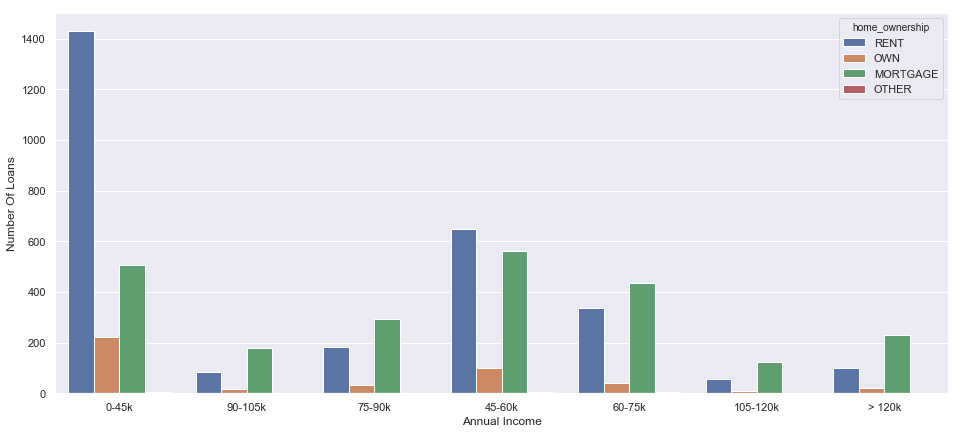

In [48]:
# Annual Income and Ownership
plt.figure(figsize = (16 , 7))
sns.countplot(x="annual_inc_groups",data=loan_df[loan_df['loan_status'] == 'Charged Off'] ,hue='home_ownership')
plt.xlabel('Annual Income')
plt.ylabel('Number Of Loans' )
plt.show()

Observations: In each income group applicants with Rented or Mortgaged home ownership tend to default more.

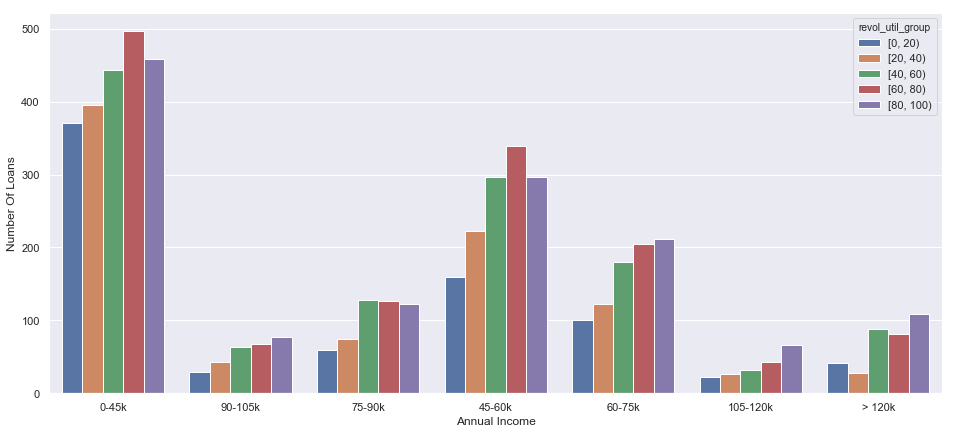

In [49]:
# Annual Income and Revol Util
plt.figure(figsize = (16 , 7))
sns.countplot(x="annual_inc_groups",data=loan_df[loan_df['loan_status'] == 'Charged Off'] ,hue='revol_util_group')
plt.xlabel('Annual Income')
plt.ylabel('Number Of Loans' )
plt.show()

Observation: In each income group applicants with high revol util rates tend to default more.

#### Final Observations:

Following Variables for any applicant are vital to understand whether they are going to default on a loan.

1. Annual Income: Applicants with lower income tends to default more.

2. Grades: Grades and rate of interest show a similar trend. Grades increases alpabetically and corresponding rate of interest also increases. Applicants having highest rate of interest (Grade G) tend to default most. Most of the applicants lie in grade B to D.

3. Revol_Util: Rate of revolving utilization is directly proptional to loan default. As this rate increase there is high chance that applicant will default.

4. Some States are safe having no defaulters (IA,IN, ME). Whereas in State like NV and CA there are high number of defaulters.

5. Term: Applicants with 60 months term duration tend to default more.

6. Home Ownership- Applicants with other type of home ownership tend to default more.

7. Purpose: Applicants taking loan for Small Business, Debt Consolidation and Credit Card tend to default more than any other purposes.

8. Verification Status: Verification process needs to be improved. Applicants with source verified and verified status tends to default more.